Import Packages

In [11]:
# feel free to add more
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 50)

Read Data

In [3]:
df = pd.read_csv('data/garments_worker_productivity.csv')

In [4]:
# Check which variable contains missing values
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [5]:
# Since about 50% of the observations in wip are missing, we may consider delete this variable, but feel free to use other treatments.
df = df.drop(['wip'], axis = 1)
# Since workday and quarter area already captured in different features, we can probably delete date
df = df.drop(['date'], axis = 1)
# The variable idle_men seems to contain little information that is not already captured by idle time
df = df.drop(['idle_men'], axis = 1)
# Idle time is mostly 0 - thus dichotomizing it makes sense
df['idle_time'] = df['idle_time'].apply(lambda x: 1 if x > 0 else x)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   no_of_style_change     1197 non-null   int64  
 10  no_of_workers          1197 non-null   float64
 11  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 112.3+ KB


In [7]:
#I made team a category (even though its a number), same with targets and changes
cat_cols = ['quarter', 'department', 'day', 'team', 'targeted_productivity', 'no_of_style_change']
num_cols = ['smv', 'over_time', 'incentive', 'no_of_workers']
#One hot encoding, dropping the first category
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
#Standardizing all features (not the labels)
scaler= StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

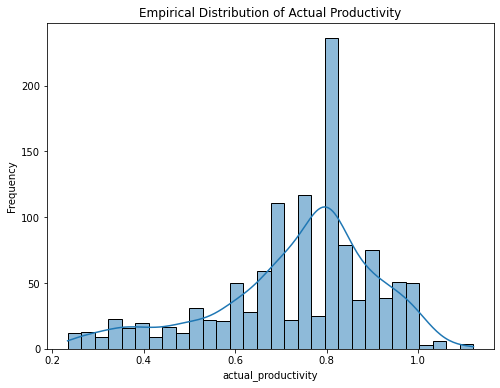

In [8]:
# What is our dependent variable/label?
response_variable = df['actual_productivity']

# Plot the empirical distribution
plt.figure(figsize = (8, 6))
sns.histplot(response_variable, kde = True, bins = 30)  # kde = True plots the kernel density estimate
plt.title('Empirical Distribution of Actual Productivity')
plt.xlabel('actual_productivity')
plt.ylabel('Frequency')
plt.show()

Assuming we are doing a regressing task for now, can you try identify any features thay may contribute to an employee's actual productivity?

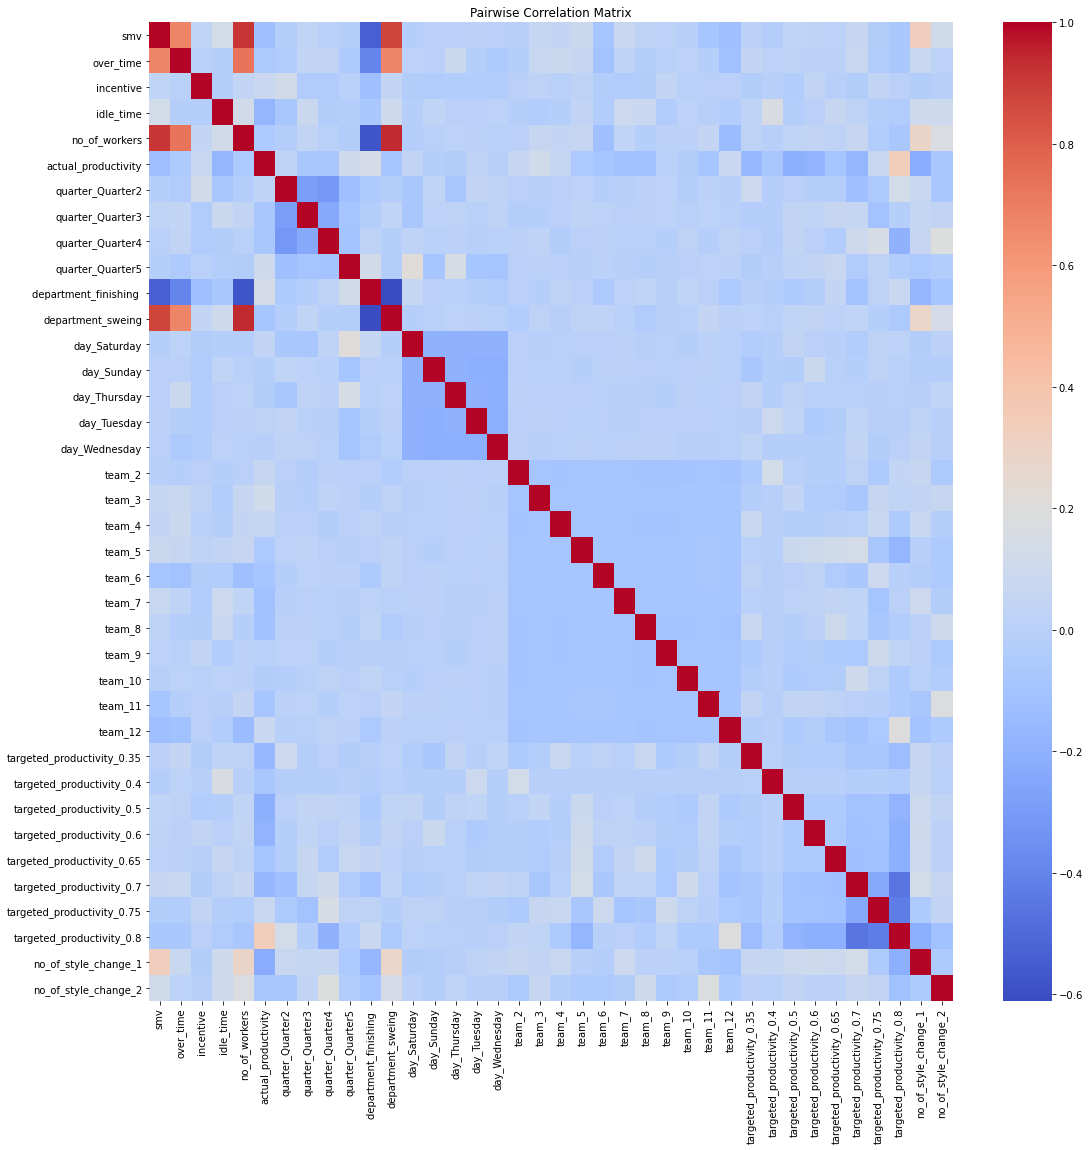

In [9]:
# A grid plot for pairwise correlation may be helpful 

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize = (18, 18))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=False)
plt.title('Pairwise Correlation Matrix')
plt.show()

# What features are highly correlated to the response?
# what another important signal you see from the correlation matrix?

In [12]:
df.head()

,smv,over_time,incentive,idle_time,no_of_workers,actual_productivity,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,targeted_productivity_0.35,targeted_productivity_0.4,targeted_productivity_0.5,targeted_productivity_0.6,targeted_productivity_0.65,targeted_productivity_0.7,targeted_productivity_0.75,targeted_productivity_0.8,no_of_style_change_1,no_of_style_change_2
0,1.014552,0.750589,0.373414,0.0,1.099229,0.940725,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.016778,-1.077682,-0.238643,0.0,-1.199268,0.886500,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.333878,-0.271092,0.073631,0.0,-0.185225,0.800570,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,-0.333878,-0.271092,0.073631,0.0,-0.185225,0.800570,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.990783,-0.790895,0.073631,0.0,0.964023,0.800382,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Client A


In [21]:
# Prepare features and target variables
X = df.drop(['actual_productivity'], axis=1)
y = df['actual_productivity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model for Client Type A (Random Forest Regressor)
model_A = RandomForestRegressor(n_estimators=100, random_state=42)
model_A.fit(X_train, y_train)

# Predictions for Client Type A
y_pred_A = model_A.predict(X_test)

# Evaluate Model A
mse_A = mean_squared_error(y_test, y_pred_A)
r2_A = r2_score(y_test, y_pred_A)

print("Model A (Random Forest Regressor) Results:")
print(f"Mean Squared Error: {mse_A}")
print(f"R-squared Score: {r2_A}")

# Calculate expected revenue for Client Type A
revenue_A = y_pred_A * 120

Model A (Random Forest Regressor) Results:
Mean Squared Error: 0.014788356062909938
R-squared Score: 0.4430515127566548


Client B

In [31]:
# Model for Client Type B (Random Forest Classifier)
y_binary = (y > 0.80).astype(int)
y_train_binary = (y_train > 0.80).astype(int)
y_test_binary = (y_test > 0.80).astype(int)

model_B = RandomForestClassifier(n_estimators=100, random_state=42)
model_B.fit(X_train, y_train_binary)

# Predictions for Client Type B
y_pred_proba_B = model_B.predict_proba(X_test)[:, 1]
y_pred_B = (y_pred_proba_B > 0.5).astype(int)

# Evaluate Model B
accuracy_B = accuracy_score(y_test_binary, y_pred_B)
precision_B = precision_score(y_test_binary, y_pred_B)
recall_B = recall_score(y_test_binary, y_pred_B)
f1_B = f1_score(y_test_binary, y_pred_B)
roc_auc_B = roc_auc_score(y_test_binary, y_pred_proba_B)
conf_matrix_B = confusion_matrix(y_test_binary, y_pred_B)

print("\nModel B (Random Forest Classifier) Results:")
print(f"Accuracy: {accuracy_B:.4f}")
print(f"Precision: {precision_B:.4f}")
print(f"Recall: {recall_B:.4f}")
print(f"F1 Score: {f1_B:.4f}")
print(f"ROC AUC: {roc_auc_B:.4f}")

# Calculate expected revenue for Client Type B
revenue_B = y_pred_B * 250


Model B (Random Forest Classifier) Results:
Accuracy: 0.8625
Precision: 0.8624
Recall: 0.8393
F1 Score: 0.8507
ROC AUC: 0.9388


Comparisons


Revenue Comparison:
Average Revenue per worker (Client A): $87.83
Average Revenue per worker (Client B): $113.54


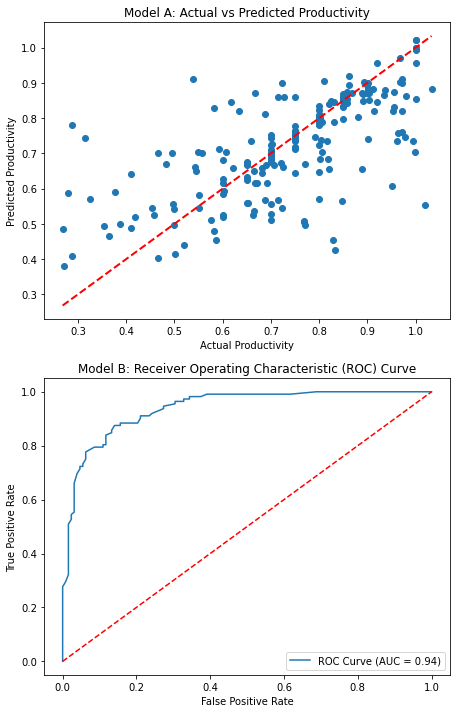

In [44]:
# Compare revenues
print("\nRevenue Comparison:")
print(f"Average Revenue per worker (Client A): ${revenue_A.mean():.2f}")
print(f"Average Revenue per worker (Client B): ${revenue_B.mean():.2f}")

# Visualize the results
plt.figure(figsize=(16, 12))

# Model A: Actual vs Predicted Productivity
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_A)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Model A: Actual vs Predicted Productivity")

# Model B: ROC Curve
plt.subplot(2, 2, 3)
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba_B)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_B:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model B: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [45]:
# Decision Rules
placement_cost = 70

def decide_placement_A(predicted_productivity):
    expected_revenue = predicted_productivity * 120
    expected_profit = expected_revenue - placement_cost
    return expected_profit > 0

def decide_placement_B(predicted_probability):
    expected_revenue = predicted_probability * 250
    expected_profit = expected_revenue - placement_cost
    return expected_profit > 0

In [46]:
# Apply decision rules
placements_A = decide_placement_A(y_pred_A)
placements_B = decide_placement_B(y_pred_proba_B)

# Calculate profits
profits_A = np.where(placements_A, y_test * 120 - placement_cost, 0)
profits_B = np.where(placements_B, (y_test > 0.80) * 250 - placement_cost, 0)

In [49]:
# Results
print("Client Type A Results:")
print(f"Number of workers placed: {placements_A.sum()}")
print(f"Total profit: ${profits_A.sum():.2f}")
print(f"Average profit per placement: ${profits_A[placements_A].mean():.2f}")

print("\nClient Type B Results:")
print(f"Number of workers placed: {placements_B.sum()}")
print(f"Total profit: ${profits_B.sum():.2f}")
print(f"Average profit per placement: ${profits_B[placements_B].mean():.2f}")

Client Type A Results:
Number of workers placed: 198
Total profit: $4669.10
Average profit per placement: $23.58

Client Type B Results:
Number of workers placed: 137
Total profit: $16410.00
Average profit per placement: $119.78


In [66]:
# Random placement for comparison
def random_placement(n_placements, n_total):
    prob_true = n_placements/n_total
    return np.random.choice([True, False], size=n_total, p=[prob_true, 1-prob_true])

random_placements_A = random_placement(placements_A.sum(), len(y_test))
random_placements_B = random_placement(placements_B.sum(), len(y_test))

random_profits_A = np.where(random_placements_A, y_test * 120 - placement_cost, 0)
random_profits_B = np.where(random_placements_B, (y_test > 0.80) * 250 - placement_cost, 0)

print("\nRandom Placement Results:")
print(f"Client A - Total profit: ${random_profits_A.sum():.2f}")
print(f"Client B - Total profit: ${random_profits_B.sum():.2f}")

# Model value
model_value_A = profits_A.sum() - random_profits_A.sum()
model_value_B = profits_B.sum() - random_profits_B.sum()

print("\nModel Value:")
print(f"Client A - Model adds ${model_value_A:.2f} in value")
print(f"Client B - Model adds ${model_value_B:.2f} in value")


Random Placement Results:
Client A - Total profit: $4027.82
Client B - Total profit: $6690.00

Model Value:
Client A - Model adds $641.28 in value
Client B - Model adds $9720.00 in value
